<a href="https://colab.research.google.com/github/wisdomscode/AI-Lab-Deep-Learning-PyTorch/blob/main/AI_LAb_Project_4_2__Celebrity_Sighting_In_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Face Detection and Face Recognition


**Face Detection** is computer vision task where we identicaly the presence and locate the position of a face in a digital image


**How it works**
1. Scan image for faces
2. Look for features (like edges and textures)
3. Mark areas with a face


**Face recognition** is identify who a detected face blongs to.

**How it works**

We normal run the detected face across a batabase of known faces to know who it blongs to.
1. Face embedding
   face as vector = faceprint - describe every face with a bunch of numbers
2. Face recognition
   search database of known faceprints
   computer similarities score


**Computational Method**
1. Traditional approaches (searching through)
2. Modern approaches using Deep Learning - MTCNN (Multi-task Cascaded Convolutional Networks) - face detection
- InceptionResNet - face recognition (face embeddings and face matching)


**Practical Applications**
1. Security systems
2. Smartphones
3. Social Media
4. Law Enforcement
5. Healthcare
6. virtual reality


**Challenges**
1. Technical chanlleges (face lightening, face positioning)
2. provacy Concerns
3. Ethical issues with Bias and fairness


### Introduction

Let's first import the libraries we'll be using. We're using the same libraries we used in previous projects.

In [ ]:
import subprocess
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import pytubefix
import torch
import torchvision
from IPython.display import Video
from pytubefix import YouTube
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid

We'll also print out library versions as well as the Python version. This makes our analysis reproducible for anyone who wants to review or reuse our work.

In [ ]:
print("torch version : ", torch.__version__)
print("pytube version : ", pytubefix.__version__)
print("torchvision version : ", torchvision.__version__)
print("cv2 version : ", cv2.__version__)

!python --version

### Fetching YouTube Video Data

For this project, we'll use a video of an interview with an Indian Olympic boxer [Mary Kom](https://en.wikipedia.org/wiki/Mary_Kom). She's a legendary athlete with many achievements. Among others, she's the only boxer to ever win eight World Championship medals.

We'll load the video of her interview from YouTube. We want to put the video file in directory `"data"` which should be in the `"project4"` directory.

**Task 4.2.1:** Create a variable for the video directory using `pathlib` syntax.

In [ ]:
project_dir = Path("project4")
data_dir = "data"
video_dir = project_dir / data_dir

print(video_dir)

#output
project4/data


Next we'll need to specify the URL of the YouTube video and download the video. We decided to save the video under file name `video_name = "mary_kom.mp4"`.

In [ ]:
video_name = "mary_kom.mp4"
video_url = "https://www.youtube.com/watch?v=XScnCdyVbIU"
yt = YouTube(video_url)

Because downloading from YouTube doesn't always work, we wrapped the code in a `try/except` block.

**Task 4.2.2:** Fill in the missing code in the `else` part of the `try/except` block below. If grabbing the YouTube stream worked, we want to download the video to directory `video_dir` using file name `video_name`.

In [ ]:
from urlib.error import HTTPError

try:
  stream = yt.streams.get_highest_resolution()
except HTTPError:
  # In case the YouTube download failed, we downlaod the video from cloud storage
  print("Downloading from cloud storage...")
  if not (video_dir / video_name).exists():
    video_dir.mkdir(parents=True, exist_ok=True)
    !gcloud storage cp --no-clobber gs://wqu-cv-course-datasets/mary_kom.mp4 {video_dir}
else:
  print("Downloading from YouTube...")
  stream.download(output_path=video_dir, filename=video_name)

The video is already available in the following location:

In [ ]:
!ls -l project4/data/

#ouytput
-rw-r--r-- 1 root root 155978059 Dec 14 09:08 mary_kom.mp4


**Task 4.2.3:** Create a variable for the video file path using `pathlib` syntax.

In [ ]:
input_video = video_dir / video_name

print(input_video)

#output
project4/data/mary_kom.mp4


Now let's take a peak of the video.

In [ ]:
# Display the video
Video(input_video, width=400)

The video is quite long and we'll only need a small portion of it. In a previous project, we
truncated a video with `ffmpeg`, a command line tool for video and audio editing. This time, let's create a Python function that can cut down the video!

**Task 4.2.4:** Fill in the missing code that defines the signature of the `cut_video` function. By looking at the function's doc string, you can see what the input parameters should be.

**Cut Video Down**

In [ ]:
def cut_video(input_file, output_file, start_time, duration):
    """
    Cuts a portion of the video.

    :parameter input_file: Path to the input video file.
    :parameter output_file: Path to the output video file.
    :parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
    :parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
    """
    command = [
        "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)


cut_video?

In [ ]:
#output

Signature: cut_video(input_file, output_file, start_time, duration)
Docstring:
Cuts a portion of the video.

:parameter input_file: Path to the input video file.
:parameter output_file: Path to the output video file.
:parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
:parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
File:      /tmp/ipykernel_19/1177039216.py
Type:      function


Before we use this function, we should first prepare the output video path where we want to save the shortened video (`output_file` parameter we need to pass to the function).

**Task 4.2.5:** Create a variable for the output video file path using `pathlib` syntax. Let's call the file `"output.mp4"`. It should be in the same directory as our input video file.

In [ ]:
output_video_name = "output.mp4"

output_video = video_dir / output_video_name

print(output_video)

#output
project4/data/output.mp4


**Task 4.2.6:** Call the `cut_video` function using the `input_video` and `output_video` variables you defined in the previous tasks.

In [ ]:
start_time = "00:00:00"  # Start at 00 seconds
duration = "00:01:00"  # Cut 1 minute

# Call cut_video function
cut_video(input_video, output_video, start_time, duration)

In [ ]:
#output

ffmpeg version 4.3.7-0+deb11u1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 10 (Debian 10.2.1-6)
  configuration: --prefix=/usr --extra-version=0+deb11u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzmq --enable-libzvbi --enable-lv2 --enable-omx --enable-openal --enable-opencl --enable-opengl --enable-sdl2 --enable-pocketsphinx --enable-libmfx --enable-libdc1394 --enable-libdrm --enable-libiec61883 --enable-chromaprint --enable-frei0r --enable-libx264 --enable-shared
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc    55.  7.100 / 55.  7.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'project4/data/mary_kom.mp4':
  Metadata:
    major_brand     : mp42
    minor_version   : 0
    compatible_brands: isommp42
    creation_time   : 2024-09-27T22:12:39.000000Z
    encoder         : Google
  Duration: 01:25:40.46, start: 0.000000, bitrate: 242 kb/s
    Stream #0:0(und): Video: h264 (Main) (avc1 / 0x31637661), yuv420p(tv, bt709), 640x360 [SAR 1:1 DAR 16:9], 111 kb/s, 25 fps, 25 tbr, 12800 tbn, 50 tbc (default)
    Metadata:
      creation_time   : 2024-09-27T22:12:39.000000Z
      handler_name    : ISO Media file produced by Google Inc. Created on: 09/27/2024.
    Stream #0:1(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, stereo, fltp, 128 kb/s (default)
    Metadata:
      creation_time   : 2024-09-27T22:12:39.000000Z
      handler_name    : ISO Media file produced by Google Inc. Created on: 09/27/2024.
Output #0, mp4, to 'project4/data/output.mp4':
  Metadata:
    major_brand     : mp42
    minor_version   : 0
    compatible_brands: isommp42
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: h264 (Main) (avc1 / 0x31637661), yuv420p(tv, bt709), 640x360 [SAR 1:1 DAR 16:9], q=2-31, 111 kb/s, 25 fps, 25 tbr, 12800 tbn, 12800 tbc (default)
    Metadata:
      creation_time   : 2024-09-27T22:12:39.000000Z
      handler_name    : ISO Media file produced by Google Inc. Created on: 09/27/2024.
    Stream #0:1(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, stereo, fltp, 128 kb/s (default)
    Metadata:
      creation_time   : 2024-09-27T22:12:39.000000Z
      handler_name    : ISO Media file produced by Google Inc. Created on: 09/27/2024.
Stream mapping:
  Stream #0:0 -> #0:0 (copy)
  Stream #0:1 -> #0:1 (copy)
Press [q] to stop, [?] for help
frame= 1501 fps=0.0 q=-1.0 Lsize=    2506kB time=00:00:59.97 bitrate= 342.2kbits/s speed=4.18e+03x
video:1519kB audio:938kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.971879%

Well done! We should be able to display this shortened one minute video we created.

In [ ]:
# Display the video
Video(output_video, width=400)

Let's also delete the long original video now that we no longer need it

In [ ]:
# delete original video
input_video.unlink()

### Exploring and Preparing the Data

Let's learn a bit more about our video data. We're curious about things like the frame rate, total frame count, and frame shape. To get this information, we'll use the `opencv-python` library just like in the previous project (`cv2` which we imported at the top of the notebook).

The first step is to create a video capture using `cv2.VideoCapture` and pass in the path to our video.

**Task 4.2.7:** Create a video capture for the one minute video we're working with. The rest of the code computes the frame rate and total frame count.

In [ ]:
video_capture = cv2.VideoCapture(output_video)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count}")

In [ ]:
#output

Frame rate: 25.0
Total number of frames: 1501

Now let's display the first frame. We can fetch the first frame of our video capture by calling the `read()` method on it.

**Task 4.2.8:** Use the video capture variable you defined in the previous task and fetch the first frame. The rest of the code will display the frame.

In [ ]:
ret, first_frame = video_capture.read()

if ret:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

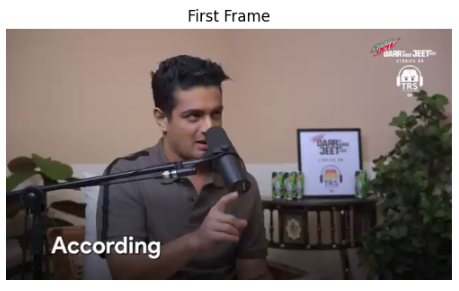

**Task 4.2.9:** Get the shape of the frame and the number of channels by calling the `shape` attribute on the `first_frame` variable.

In [ ]:
height, width, channel = first_frame.shape

print("frames height : ", height)
print("frames width : ", width)
print("frames channel : ", channel)

#output

frames height :  360
frames width :  640
frames channel :  3

The next thing we need to do is extract the individual frames from the video.

**Task 4.2.10:** Create a directory path for the extracted frames using the `pathlib` syntax. This path should be a directory called `extracted_frames` which should be in `video_dir`.

In [ ]:
frames_dir = video_dir / "extracted_frames"

frames_dir.mkdir(exist_ok=True)
print(frames_dir)

#output
project4/data/extracted_frames


**Task 4.2.11:** Fill in the missing code below that saves every fifth frame from the video.

In [ ]:
interval = frame_rate * 0.20  # Extract every fifth frame from the video
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = video_capture.read()
    if not ret:
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % interval == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

In [ ]:
#output

Start extracting individual frames...
Finished!

**Task 4.2.12:** Compute the number of frames we've extracted by using `iterdir()` method on the `frames_dir` path. That'll give you a generator that you need to covert to `list` before using`len`.

In [ ]:
n_extraced_frames = len(list(frames_dir.iterdir()))

print(f"We saved {n_extraced_frames} frames.")

#output
We saved 300 frames.


To conclude this lesson, let's display some sample frames that we extracted. The function `display_sample_images` below that'll display a grid of sample frames is the same as the one we used in the previous project.

**Task 4.2.13:** Fill in the missing code in `display_sample_images` function.

In [ ]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))

            # Define resizing transformation that resizes to 240 x 240
            resize_transform = transforms.Resize((240, 240))
            # Resize image by using `resize_transform`
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images?

In [ ]:
#output
Signature: display_sample_images(dir_path, sample=5)
Docstring: <no docstring>
File:      /tmp/ipykernel_19/3359215917.py
Type:      function

**Task 4.2.14:** Use `display_sample_images` function to display 20 of the frames that we extracted.

In [ ]:
# Call function `display_sample_images` on `frames_dir`
display_sample_images(frames_dir, 20)

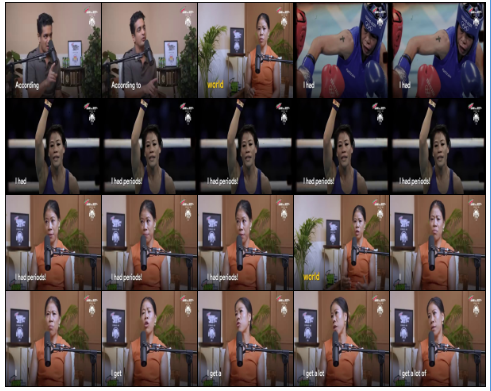